verilerin çekilmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
data = pd.read_excel('C:/Users/Eugeo/Downloads/ist405_ara_sinav_data.xls', header=1)


In [2]:
print(data.head(5))
data.isnull().any()

   hastaNo  YAŞ  cınsıyet  egıtımduzeyı  meslegı  sıgarakullanımı  \
0        1   76         1             3        2                2   
1        2   44         1             2        6                2   
2        3   68         1             3        2                2   
3        4   54         1             2        2                2   
4        5   59         1             5        2                2   

   sıgarayıbırakannekadarGÜNıcmıs  sıgarabırakangundekacadetıcmıs  \
0                          7300.0                            20.0   
1                          7300.0                            20.0   
2                         18250.0                            20.0   
3                         14600.0                             6.0   
4                         18250.0                            20.0   

   nezamanbırakmısGÜN  sıgarayadevamedengundekacadetıcıyo  ...  FEV1  FEV1 %  \
0         3650.000000                                 NaN  ...  1.02      38   
1         

hastaNo                                False
YAŞ                                    False
cınsıyet                               False
egıtımduzeyı                           False
meslegı                                False
sıgarakullanımı                        False
sıgarayıbırakannekadarGÜNıcmıs          True
sıgarabırakangundekacadetıcmıs          True
nezamanbırakmısGÜN                      True
sıgarayadevamedengundekacadetıcıyo      True
basvurutarıhı                          False
tanı                                   False
tanısuresıyıl                          False
tanısuresıay                           False
hastaneyeyattımı                       False
acılservıseyatıssayısı                 False
acılservısetoplamyatıssuresısaat       False
acilservistoplamyatışsüresigün         False
yogumbakımayatıssayısı                 False
yogumbakımatoplamyatıssuresısaat       False
yogumbakımatoplamyatıssüresıgun        False
servıseyatıssayısı                     False
servıseopl

aykırı değerlerin neler olduğunuveren kod

In [3]:
# String 'na' değerlerini NaN ile değiştir
data.replace("na", np.nan, inplace=True)

missing_values = data.isnull().sum()
missing_valuess = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_valuess}))

                                    Missing Values
sıgarayıbırakannekadarGÜNıcmıs                 279
sıgarabırakangundekacadetıcmıs                 279
nezamanbırakmısGÜN                             279
sıgarayadevamedengundekacadetıcıyo             391
tanısuresıyıl                                    6
tanısuresıay                                     6
kanbasıncısıstolık                               1
kanbasıncıdıastolık                              1
FEV1                                           164
PEF                                            164
PEF %                                            2
varsakımde ANNE                                  1
varsakımde BABA                                  3
varsakımde KARDES                                3
varsakımde DİĞER                                 3


C:\Users\Eugeo\AppData\Local\Temp\ipykernel_18816\1869089241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("na", np.nan, inplace=True)


sıgarakullanımı ilişkisine bakılrı ve ilişki fazlayok ve eksik değer

In [4]:


corr = data.corr()['sıgarakullanımı'].sort_values(ascending=False)
# 0.5'ten büyük olanları filtreleyelim
high_correlation = corr[(corr > 0.3) | (corr < -0.3)]

print(high_correlation)


sıgarakullanımı                       1.000000
tanı                                  0.412069
sıgarayadevamedengundekacadetıcıyo    0.358915
cınsıyet                             -0.378495
Name: sıgarakullanımı, dtype: float64


sigara kulanmayan kişilerin bütün sigara ile ilgili alanlarını 0 yapıyorum

In [5]:
data.loc[data['sıgarakullanımı'] == 1, ['sıgarayıbırakannekadarGÜNıcmıs', 'sıgarabırakangundekacadetıcmıs','nezamanbırakmısGÜN','sıgarayadevamedengundekacadetıcıyo']] = 0
missing_values = data.isnull().sum()
missing_valuess = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_valuess}))

                                    Missing Values
sıgarayıbırakannekadarGÜNıcmıs                 102
sıgarabırakangundekacadetıcmıs                 102
nezamanbırakmısGÜN                             103
sıgarayadevamedengundekacadetıcıyo             214
tanısuresıyıl                                    6
tanısuresıay                                     6
kanbasıncısıstolık                               1
kanbasıncıdıastolık                              1
FEV1                                           164
PEF                                            164
PEF %                                            2
varsakımde ANNE                                  1
varsakımde BABA                                  3
varsakımde KARDES                                3
varsakımde DİĞER                                 3


ikinci olarak sigara içenleder durumu 2 (sigarayı brakanlarda) olan sigaraya denam eden gün 0 değerlerini veriyorum eksik değrileri de ortalamaya göre dolduracağım.

In [6]:
# Doldurulacak sütunları belirleyelim
target_columns = ['nezamanbırakmısGÜN','sıgarabırakangundekacadetıcmıs','sıgarayıbırakannekadarGÜNıcmıs']

# Her bir hedef sütun için, 0'dan farklı olan değerlerin ortalamasını alıyoruz
mean_values = {}
for column in target_columns:
    mean_values[column] = data.loc[data[column] != 0, column].median()

# Sigara kullanımı 2 olanlar için NaN olan hücreleri ortalama ile dolduruyoruz
for column in target_columns:
    data.loc[(data['sıgarakullanımı'] == 2) & (data[column].isnull()), column] = mean_values[column]

data.loc[data['sıgarakullanımı'] == 2,['sıgarayadevamedengundekacadetıcıyo']] = 0
missing_values = data.isnull().sum()
missing_valuess = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_valuess}))


                                Missing Values
sıgarayıbırakannekadarGÜNıcmıs             102
sıgarabırakangundekacadetıcmıs             102
nezamanbırakmısGÜN                         101
tanısuresıyıl                                6
tanısuresıay                                 6
kanbasıncısıstolık                           1
kanbasıncıdıastolık                          1
FEV1                                       164
PEF                                        164
PEF %                                        2
varsakımde ANNE                              1
varsakımde BABA                              3
varsakımde KARDES                            3
varsakımde DİĞER                             3


Şimdi geri kalanların (hala sigara içenler) na değerlerini diğer değişkenlerin (0) olanlar hariç ortalamaları alınarak değerleri ile doldurulur

In [7]:
# Doldurulacak sütunları belirleyelim
target_columns = ['sıgarayadevamedengundekacadetıcıyo']

# Her bir hedef sütun için, 0'dan farklı olan değerlerin ortalamasını alıyoruz
mean_values = {}
for column in target_columns:
    mean_values[column] = data.loc[data[column] != 0, column].median()

# Sigara kullanımı 3 olanlar için NaN olan hücreleri ortalama ile dolduruyoruz
for column in target_columns:
    data.loc[(data['sıgarakullanımı'] == 3) & (data[column].isnull()), column] = mean_values[column]
    
data.loc[data['sıgarakullanımı'] == 3,['nezamanbırakmısGÜN','sıgarayıbırakannekadarGÜNıcmıs','sıgarabırakangundekacadetıcmıs']] = 0
missing_values = data.isnull().sum()
missing_valuess = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_valuess}))

                     Missing Values
tanısuresıyıl                     6
tanısuresıay                      6
kanbasıncısıstolık                1
kanbasıncıdıastolık               1
FEV1                            164
PEF                             164
PEF %                             2
varsakımde ANNE                   1
varsakımde BABA                   3
varsakımde KARDES                 3
varsakımde DİĞER                  3


şimdi ailede koah veya astım Tanılı Hasta varmı sorsunun 1 (hayır) diyenlerin varsakımde ANNE,varsakımde BABA,varsakımde KARDES,varsakımde DİĞER leri tamamı 0 olmak zorunda.
ailede koah veya astım Tanılı Hasta varmı sorsunun 2 (evet) diyenlerin varsakımde bir tane değrde ANNE,varsakımde değri 1 olan ve diğerilerin na olduğundan diğer değrelrin 0 değeri doldurum çünkü ailede koah veya astım Tanılı Hasta varmı sorusuna 2 değrin verebilmek için 
en az 1 değer olması gerekmekterdi.

Burada ailedekoahveyaastımTanılıHastavarmı  1 olanlarını değerlerini 0 yapıyorum

In [8]:

target_columns = ['varsakımde ANNE', 'varsakımde BABA','varsakımde KARDES','varsakımde DİĞER']
condition = (data['ailedekoahveyaastımTanılıHastavarmı'] == 1) & (
    data[target_columns].eq(1).any(axis=1)
)

# 'ailedekoahveyaastımTanılıHastavarmı' sütununu 2 olarak güncelleme
data.loc[condition, 'ailedekoahveyaastımTanılıHastavarmı'] = 2

burda ailesinde hastalık olanmların da var olanlar seçimi incelendiğinde  varsakımde ANNE,varsakımde BABA,varsakımde KARDES,varsakımde DİĞER na değerleri var . bu na değerlerini bulmak için ailesinde hastalık olanmların da var olamsı için en az kaç tane kişinin olması gerektiğin bulmak için satır bazında toplam yaptım ve ortalama ve median baklıdığında en az 1 değerin olmasının yettiğini buldum ondan değier değrelrini 0 yapıyorum

çıktıda anne de koha varsa dğer öğelere 0 değeri atıyorum çünkü ailede koha hastası tanısı olması için en az bir kişide olması yeterli

In [9]:
target_columns = ['varsakımde BABA','varsakımde KARDES','varsakımde DİĞER']
data.loc[data['ailedekoahveyaastımTanılıHastavarmı'] == 2, target_columns] = data.loc[data['ailedekoahveyaastımTanılıHastavarmı'] == 2, target_columns].fillna(0)
print(data[data['hastaNo'] == 304][['varsakımde ANNE', 'varsakımde BABA','varsakımde KARDES','varsakımde DİĞER']])
print(data[data['hastaNo'] == 288][['varsakımde ANNE', 'varsakımde BABA','varsakımde KARDES','varsakımde DİĞER']])

     varsakımde ANNE  varsakımde BABA  varsakımde KARDES  varsakımde DİĞER
303              1.0              0.0                0.0               0.0
     varsakımde ANNE  varsakımde BABA  varsakımde KARDES  varsakımde DİĞER
287              1.0              0.0                0.0               0.0


'ailedekoahveyaastımTanılıHastavarmı' = 2 ise en az bir birey 1 olmalı değil ise ailedekoahveyaastımTanılıHastavarmı 1 değerini alırnı yaptım

In [10]:
# Mantıksal kontrol: Eğer 'ailedekoahveyaastımTanılıHastavarmı' = 2 ise en az bir birey 1 olmalı
def kontrol_et_ve_duzelt(row):
    if row['ailedekoahveyaastımTanılıHastavarmı'] == 2:
        # Aile bireylerinde en az biri 1 mi?
        if not (row['varsakımde ANNE'] or row['varsakımde BABA'] or row['varsakımde KARDES'] or row['varsakımde DİĞER']):
            # Eğer hiçbiri 1 değilse, bir uyarı verebilir ya da düzeltme yapabilirsiniz
            print(f"Hata bulundu! Satır: {row.name}")
            # Burada düzeltme yapılabilir (örneğin, DİĞER'i 1 yaparak)
            row['ailedekoahveyaastımTanılıHastavarmı'] = 1
    return row

# Kontrol ve düzeltme işlemi
data = data.apply(kontrol_et_ve_duzelt, axis=1)

Hata bulundu! Satır: 97
Hata bulundu! Satır: 105
Hata bulundu! Satır: 111
Hata bulundu! Satır: 112
Hata bulundu! Satır: 126
Hata bulundu! Satır: 131
Hata bulundu! Satır: 142
Hata bulundu! Satır: 154
Hata bulundu! Satır: 170
Hata bulundu! Satır: 181
Hata bulundu! Satır: 206
Hata bulundu! Satır: 210
Hata bulundu! Satır: 216
Hata bulundu! Satır: 223
Hata bulundu! Satır: 262
Hata bulundu! Satır: 272
Hata bulundu! Satır: 280
Hata bulundu! Satır: 298
Hata bulundu! Satır: 304
Hata bulundu! Satır: 320
Hata bulundu! Satır: 324
Hata bulundu! Satır: 329
Hata bulundu! Satır: 344
Hata bulundu! Satır: 356
Hata bulundu! Satır: 361
Hata bulundu! Satır: 375
Hata bulundu! Satır: 384
Hata bulundu! Satır: 389
Hata bulundu! Satır: 402
Hata bulundu! Satır: 410
Hata bulundu! Satır: 417
Hata bulundu! Satır: 422
Hata bulundu! Satır: 432
Hata bulundu! Satır: 457
Hata bulundu! Satır: 465
Hata bulundu! Satır: 490
Hata bulundu! Satır: 496


tekradana veri deki eksik verileri neler olduğuna baktım

In [11]:
# Eksik değerler sonrası veri kontrolü
missing_values = data.isnull().sum()
print(pd.DataFrame({'Missing Values': missing_values[missing_values > 0]}))

                     Missing Values
tanısuresıyıl                     6
tanısuresıay                      6
kanbasıncısıstolık                1
kanbasıncıdıastolık               1
FEV1                            164
PEF                             164
PEF %                             2
varsakımde ANNE                   1
varsakımde BABA                   1
varsakımde KARDES                 1
varsakımde DİĞER                  1


burda eksik gözlemlerin ne olduğuna baktım ve bütün satır nul değeri verdi ve ailedekoahveyaastımTanılıHastavarmı =1 olduğundan diğer na delerleri 0 yaptım

In [12]:
# Eksik değerleri kontrol et ve belirtilen sütunlarda eksik veri olan satırları seç
filtered_missing = data[
    data[['varsakımde ANNE', 'varsakımde BABA', 'varsakımde KARDES', 'varsakımde DİĞER']].isnull().any(axis=1)
]

# Sonuçları göster
print(filtered_missing)

# 'varsakımde ANNE', 'varsakımde BABA', 'varsakımde KARDES', 'varsakımde DİĞER' sütunlarında eksik verileri 0 ile doldur
data[['varsakımde ANNE', 'varsakımde BABA', 'varsakımde KARDES', 'varsakımde DİĞER']] = data[['varsakımde ANNE', 'varsakımde BABA', 'varsakımde KARDES', 'varsakımde DİĞER']].fillna(0)

    hastaNo  YAŞ  cınsıyet  egıtımduzeyı  meslegı  sıgarakullanımı  \
89       90   53         2             5        1                1   

    sıgarayıbırakannekadarGÜNıcmıs  sıgarabırakangundekacadetıcmıs  \
89                             0.0                             0.0   

    nezamanbırakmısGÜN  sıgarayadevamedengundekacadetıcıyo  ...  FEV1  FEV1 %  \
89                 0.0                                 0.0  ...  0.83      29   

     PEF  PEF %  FEV1/FVC Değeri  ailedekoahveyaastımTanılıHastavarmı  \
89  1.92   25.0             77.5                                    1   

    varsakımde ANNE  varsakımde BABA  varsakımde KARDES  varsakımde DİĞER  
89              NaN              NaN                NaN               NaN  

[1 rows x 40 columns]


eksik değer kontrolü

In [13]:
# Eksik değerler sonrası veri kontrolü
missing_values = data.isnull().sum()
print(pd.DataFrame({'Missing Values': missing_values[missing_values > 0]}))

                     Missing Values
tanısuresıyıl                     6
tanısuresıay                      6
kanbasıncısıstolık                1
kanbasıncıdıastolık               1
FEV1                            164
PEF                             164
PEF %                             2


burda tanı süersi yıl da değişi değerler var mı kontrolü sonucu bazı yıların buçuklu olduğunu gördüm

In [14]:
print(data['tanısuresıyıl'].unique())


[ 9.  10.   3.   6.   nan  5.  11.  30.   2.  25.   1.   8.  15.   7.
 20.  42.   4.  60.   2.5 18.   0.  45.  21.  40.  16.   3.5 24.  13.
 14.  35.  55.  17.  19.   1.5 12.  29.  22.  28.  27.  32. ]


aynı şekilde ayların da öyle

In [15]:
print(data['tanısuresıay'].unique())

[ 0.   nan  1.   6.   3.   8.   2.   1.5  9.   4.  12. ]


burdada na alan değerlerin satırlarına baktım en azından bir değer varsa ona 0 verip geçicektim ama hiç bir değer olmadığından veriden siliyorum

In [16]:
# Eksik değerleri kontrol et ve belirtilen sütunlarda eksik veri olan satırları seç
filtered_missing = data[
    data[['tanısuresıyıl','tanısuresıay']].isnull().any(axis=1)
]

# Sonuçları göster
print(filtered_missing[['tanısuresıyıl','tanısuresıay']])


     tanısuresıyıl  tanısuresıay
5              NaN           NaN
7              NaN           NaN
8              NaN           NaN
33             NaN           NaN
34             NaN           NaN
149            NaN           NaN


aynı satrı değişkenleri olduğundan doldurabileciğim bir referans yol ondan siliyorum

In [17]:
# Eksik değerleri olan belirli sütunları silme
columns_to_drop = ['tanısuresıyıl','tanısuresıay']
data = data.dropna(subset=columns_to_drop)

burda buçuklu olan depğerleri yok etmek için aya çevirip sonra tekrar yıl yapıpa yada kalan buçuklu değer gide yuvarladım

In [18]:
data.loc[data['tanısuresıyıl'].notna(), 'tanısuresıay'] += data.loc[data['tanısuresıyıl'].notna(), 'tanısuresıyıl'] * 12
data.loc[data['tanısuresıyıl'].notna(), 'tanısuresıyıl'] = 0
# Sonuçları kontrol etme
print(data['tanısuresıyıl'].unique())


[0.]


uniq değerlei veren kod

In [19]:
print(data['tanısuresıay'].unique())

[108.  120.   36.   72.   60.  132.  360.   24.  300.   12.   96.  180.
  84.  240.  504.   48.  720.   30.  216.    1.  540.    6.  252.  480.
   3.  192.   42.  288.    8.    2.    1.5 156.  168.  420.  660.  204.
 228.    9.   18.    4.  144.  348.  264.  336.  324.  384. ]


buda üste yaptığmıız terse çeviriy

In [20]:
data['tanısuresıyıl'] += (data['tanısuresıay'] // 12).astype(int)  # Yıl kısmını ekle
data['tanısuresıay'] = data['tanısuresıay'] % 12  # Kalan ay kısmını bırak
print(data['tanısuresıyıl'].unique())

[ 9. 10.  3.  6.  5. 11. 30.  2. 25.  1.  8. 15.  7. 20. 42.  4. 60. 18.
  0. 45. 21. 40. 16. 24. 13. 14. 35. 55. 17. 19. 12. 29. 22. 28. 27. 32.]


uniq değerlei veren kod ve sayılaır yuvarlıyor

In [21]:
data['tanısuresıay'] = data['tanısuresıay'].round()
print(data['tanısuresıay'].unique())
print(data['tanısuresıyıl'].unique())

[0. 6. 1. 3. 8. 2. 9. 4.]
[ 9. 10.  3.  6.  5. 11. 30.  2. 25.  1.  8. 15.  7. 20. 42.  4. 60. 18.
  0. 45. 21. 40. 16. 24. 13. 14. 35. 55. 17. 19. 12. 29. 22. 28. 27. 32.]


In [22]:
# Eksik değerler sonrası veri kontrolü
missing_values = data.isnull().sum()
print(pd.DataFrame({'Missing Values': missing_values[missing_values > 0]}))

                     Missing Values
kanbasıncısıstolık                1
kanbasıncıdıastolık               1
FEV1                            163
PEF                             163
PEF %                             1


burdada hastaneyeyattımı yatım olabilmesi için en azından bir değişkenin 1 olması gerektiğini eyer bu şartı sağlamayan hastaneyeyattımı var is onu da 1 yaprım

In [23]:
# Kontrol edilecek sütunlar
columns_to_check = [
    'acılservıseyatıssayısı',
    'acılservısetoplamyatıssuresısaat',
    'acilservistoplamyatışsüresigün',
    'yogumbakımayatıssayısı',
    'yogumbakımatoplamyatıssuresısaat',
    'yogumbakımatoplamyatıssüresıgun',
    'servıseyatıssayısı',
    'servıseoplamyatıssuresısaat',
    'servisetoplamyatıssüresıgun'
]

# Koşullu atama
data.loc[
    (data['hastaneyeyattımı'] == 2) & (data[columns_to_check].sum(axis=1) == 0), 
    'hastaneyeyattımı'
] = 1

tekrark eksi değer kontrolü

In [24]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_values}))


                     Missing Values
kanbasıncısıstolık                1
kanbasıncıdıastolık               1
FEV1                            163
PEF                             163
PEF %                             1


ilişkiler baktım bir birleri ile ilişkis vardı

In [25]:
corr = data.corr()['kanbasıncısıstolık'].sort_values(ascending=False)
# 0.5'ten büyük olanları filtreleyelim
high_correlation = corr[(corr > 0.3)|(corr < -0.3)]
print(high_correlation)


kanbasıncısıstolık     1.000000
kanbasıncıdıastolık    0.677215
YAŞ                    0.370282
Name: kanbasıncısıstolık, dtype: float64


In [26]:
corr = data.corr()['kanbasıncıdıastolık'].sort_values(ascending=False)
# 0.5'ten büyük olanları filtreleyelim
high_correlation = corr[(corr > 0.3)|(corr < -0.3)]

print(high_correlation)


kanbasıncıdıastolık    1.000000
kanbasıncısıstolık     0.677215
Name: kanbasıncıdıastolık, dtype: float64


iki değişkende bir birine bağlı olduğundan ortalama değerlerin vericem çünkü başka bir değerle anlamlı bir ilişkisi yok vende içinde farkılı bir değer varmı diye baktım ve 0 değerini gördğm

In [27]:
print(data['kanbasıncıdıastolık'].unique())

[ 98.  70.  85.  86.  72.  75.  80.  83.  95.  73.  91.  69.  87.  90.
  60.  96.  93.  88. 113.  82.  84. 119.  89.  62.  76.  49.  79. 100.
  94. 107. 108.  65. 110.  81.  59.  64.  99.  63. 102.  92.  78.  50.
 104. 101.  74.  61.  77.  68.  66.  58.  97.  nan 103.   0.  56.  71.]


In [28]:
print(data['kanbasıncısıstolık'].unique())

[159. 120. 110. 134. 144. 118. 105. 140. 160. 130. 123. 125. 136. 145.
 138. 146. 149. 165.  90. 170. 157. 129. 177. 106. 132. 100. 133. 150.
  96. 148. 135. 153. 147. 142. 162. 141. 115. 126. 111. 154. 161. 187.
 124. 185. 128. 180. 166. 131. 163. 112. 109. 103. 117.  70. 176. 167.
  98. 168. 172. 164. 139.  76. 119. 116. 169. 121. 108. 155. 137. 102.
 152. 158.  93.  91. 104.  nan 122. 101.]


kanbasıncıdıastolık kan basıncı değerinde 0 değeri var bu değrin olamaz bundan dolayı kanbasıncısıstolık karşılık gelen hangi değer var ise o değerlerin içerdiği bir ortalam yada median alınmalı

In [29]:
print(data[data['kanbasıncıdıastolık'] == 0][['kanbasıncısıstolık', 'hastaNo']])

     kanbasıncısıstolık  hastaNo
458               120.0      459


incelince değerin 120 olduğunu görüyorum bunun üzerinden işlem yapıyorum

In [30]:
# 'kanbasıncıdıastolık' = 120 olan satırlardaki 'kanbasıncısıstolık' değerlerinin ortalamasını hesaplayalım
mean_systolic = data[data['kanbasıncısıstolık'] == 120]['kanbasıncıdıastolık'].fillna(0).mean().round()
print(mean_systolic)
data.loc[data['kanbasıncıdıastolık'] == 0, 'kanbasıncıdıastolık'] = mean_systolic

73.0


In [31]:
print(data[data['hastaNo'] == 459][['kanbasıncıdıastolık', 'kanbasıncısıstolık']])

     kanbasıncıdıastolık  kanbasıncısıstolık
458                 73.0               120.0


şimdi na değrlerinin buluyorum

In [32]:
# Eksik değerleri kontrol et ve belirtilen sütunlarda eksik veri olan satırları seç
filtered_missing = data[
    data[['kanbasıncıdıastolık','kanbasıncısıstolık']].isnull().any(axis=1)
]

# Sonuçları göster
print(filtered_missing[['kanbasıncıdıastolık','kanbasıncısıstolık']])


     kanbasıncıdıastolık  kanbasıncısıstolık
444                  NaN                 NaN


aynı sütundan olduğu için siliyorum çünkğü %30 dan az

In [33]:
# 'kanbasıncısıstolık' sütunundaki NaN değerleri sil
data = data.dropna(subset=['kanbasıncısıstolık'])
data = data.dropna(subset=['kanbasıncıdıastolık'])

In [34]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_values}))

       Missing Values
FEV1              163
PEF               163
PEF %               1


In [35]:
# Sayısal sütunlarla Beklenen_FEV1 arasındaki korelasyonu hesapla
correlation_with_fev1 = data.corr()['FEV1'].sort_values(ascending=False)
high_correlation1 = correlation_with_fev1[(correlation_with_fev1 > 0.3)|(correlation_with_fev1 < -0.3)]

high_correlation1

FEV1                                1.000000
FEV1 %                              0.786115
PEF %                               0.705529
FEV1/FVC Değeri                     0.596147
acılservıseyatıssayısı             -0.333513
acılservısetoplamyatıssuresısaat   -0.350987
sıgarayıbırakannekadarGÜNıcmıs     -0.355841
servisetoplamyatıssüresıgun        -0.400610
hastaneyeyattımı                   -0.444107
tanı                               -0.447637
servıseyatıssayısı                 -0.462811
solunumsayısı                      -0.504576
YAŞ                                -0.600297
Name: FEV1, dtype: float64

FEV1 ilişkileri var bende buna uygun model kuruyorucam

In [36]:
# Sayısal sütunlarla Beklenen_FEV1 arasındaki korelasyonu hesapla
correlation_with_fev1 = data.corr()['PEF'].sort_values(ascending=False)
high_correlation1 = correlation_with_fev1[(correlation_with_fev1 > 0.3)|(correlation_with_fev1 < -0.3)]

high_correlation1

PEF                               1.000000
acilservistoplamyatışsüresigün    0.400872
Name: PEF, dtype: float64

PEF %'ilişkileri var bende buna uygun model kuruyoracam

In [37]:
# Sayısal sütunlarla Beklenen_FEV1 arasındaki korelasyonu hesapla
correlation_with_fev1 = data.corr()['PEF %'].sort_values(ascending=False)
high_correlation1 = correlation_with_fev1[(correlation_with_fev1 > 0.3)|(correlation_with_fev1 < -0.3)]

high_correlation1

PEF %                             1.000000
FEV1 %                            0.797663
FEV1                              0.705529
FEV1/FVC Değeri                   0.658856
sıgarabırakangundekacadetıcmıs   -0.333342
servisetoplamyatıssüresıgun      -0.360817
solunumsayısı                    -0.361527
sıgarayıbırakannekadarGÜNıcmıs   -0.366821
hastaneyeyattımı                 -0.371428
YAŞ                              -0.391690
tanı                             -0.419879
servıseyatıssayısı               -0.426270
Name: PEF %, dtype: float64

model kurmadan önce gereksiz verileri siliyorum

In [38]:
data = data.drop(columns=['hastaNo','basvurutarıhı'])

burda verileri birleştirme yaptım

burda pef% de için en iyi model araştırdım ama açıraı öğrenme ile karşılaşınca kendim seçtim

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def predict_missing_values_with_best_model(data, target_column):
    """
    Eksik değerlere sahip hedef sütunu tahmin eden fonksiyon.

    :param data: Veri seti (Pandas DataFrame)
    :param target_column: Eksik değerlerin olduğu hedef sütun
    :return: Veri seti, en iyi model, en iyi R^2 skoru, MAE, MSE ve kullanılan değişkenler
    """
    if target_column not in data.columns:
        raise ValueError(f"{target_column} sütunu veri setinde bulunmamaktadır.")

    # Eğitim ve eksik değer setlerini ayırma
    X_train = data.loc[data[target_column].notnull(), data.columns.difference([target_column])]
    y_train = data.loc[data[target_column].notnull(), target_column]
    X_missing = data.loc[data[target_column].isnull(), data.columns.difference([target_column])]

    # Modellerin tanımlanması
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "AdaBoost": AdaBoostRegressor(random_state=42),
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "SVR": SVR(),
        "KNeighbors": KNeighborsRegressor(),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "Huber": HuberRegressor(),
        "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
        "Bagging": BaggingRegressor(random_state=42),
        "GaussianProcess": GaussianProcessRegressor(),
        "HistGradientBoosting": HistGradientBoostingRegressor(),
        "Tweedie": TweedieRegressor(),
        "PLS": PLSRegression(),
        "Stacking": StackingRegressor(estimators=[
            ('lr', LinearRegression()),
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
        ], final_estimator=LinearRegression()),
        "XGB": XGBRegressor(random_state=42),
        "LGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
    }

    best_model = None
    best_r2 = -float('inf')
    best_mae = float('inf')
    best_mse = float('inf')
    best_model_used_features = []

    # Modelleri eğitip değerlendirme
    for model_name, model in models.items():
        pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), model)
        pipeline.fit(X_train, y_train)

        y_train_pred = pipeline.predict(X_train)

        r2 = r2_score(y_train, y_train_pred)
        mae = mean_absolute_error(y_train, y_train_pred)
        mse = mean_squared_error(y_train, y_train_pred)

        print(f"Model: {model_name}, R^2 Skoru: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

        # En iyi modeli seçme
        if r2 < 0.99 and r2 > best_r2:
            best_r2 = r2
            best_mae = mae
            best_mse = mse
            best_model = pipeline
            best_model_used_features = X_train.columns.tolist()

    if best_model is None:
        raise ValueError("En iyi model bulunamadı. R^2 skoru 0.99'dan küçük bir model yok.")

    # Eksik değerleri tahmin etme
    predicted_values = best_model.predict(X_missing)
    data.loc[data[target_column].isnull(), target_column] = predicted_values

    return data, best_model, best_r2, best_mae, best_mse, best_model_used_features

# Korelasyon analizi ve görselleştirme
def korelasyon_analizi(data, target_column):
    """
    Hedef sütun ile diğer değişkenler arasındaki korelasyonları hesaplar ve görselleştirir.

    :param data: Veri seti (Pandas DataFrame)
    :param target_column: Hedef sütun
    :return: Korelasyon katsayıları (Pandas Series)
    """
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    if target_column not in numeric_data.columns:
        raise ValueError(f"{target_column} sütunu sayısal değil veya veri setinde bulunmuyor.")

    correlations = numeric_data.corr()[target_column].drop(target_column).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
    plt.title(f"{target_column} ile Diğer Değişkenlerin Korelasyonu")
    plt.xlabel('Korelasyon Katsayısı')
    plt.ylabel('Değişkenler')
    plt.axvline(0, color='black', linestyle='--')
    plt.show()

    return correlations


Model: RandomForest, R^2 Skoru: 0.9676, MAE: 2.9015, MSE: 17.5743
Model: GradientBoosting, R^2 Skoru: 0.9366, MAE: 4.1374, MSE: 34.3645
Model: AdaBoost, R^2 Skoru: 0.8180, MAE: 8.3195, MSE: 98.5734
Model: LinearRegression, R^2 Skoru: 0.7079, MAE: 9.7866, MSE: 158.2569
Model: Ridge, R^2 Skoru: 0.7079, MAE: 9.7897, MSE: 158.2616
Model: Lasso, R^2 Skoru: 0.6749, MAE: 10.3306, MSE: 176.1094
Model: ElasticNet, R^2 Skoru: 0.6345, MAE: 11.0725, MSE: 198.0318
Model: SVR, R^2 Skoru: 0.4376, MAE: 13.5123, MSE: 304.6528
Model: KNeighbors, R^2 Skoru: 0.5860, MAE: 11.7642, MSE: 224.2626
Model: DecisionTree, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Huber, R^2 Skoru: 0.6228, MAE: 9.5130, MSE: 204.3691
Model: ExtraTrees, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Bagging, R^2 Skoru: 0.9542, MAE: 3.3183, MSE: 24.8048
Model: GaussianProcess, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: HistGradientBoosting, R^2 Skoru: 0.9791, MAE: 2.1915, MSE: 11.3441
Model: Tweedie, R^2 Skoru: 0

C:\Users\Eugeo\AppData\Local\Temp\ipykernel_18816\2204540570.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


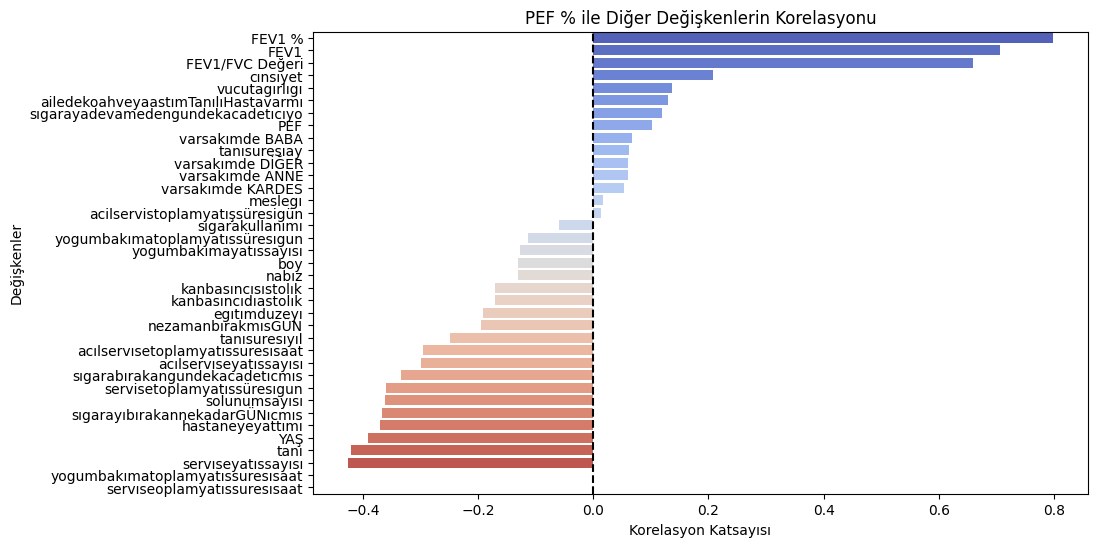

Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:
FEV1 %             0.797631
FEV1               0.705631
FEV1/FVC Değeri    0.658942
cınsıyet           0.208415
vucutagırlıgı      0.136662
Name: PEF %, dtype: float64
En iyi modelin kullandığı değişkenler: ['FEV1', 'FEV1 %', 'FEV1/FVC Değeri', 'PEF', 'YAŞ', 'acilservistoplamyatışsüresigün', 'acılservısetoplamyatıssuresısaat', 'acılservıseyatıssayısı', 'ailedekoahveyaastımTanılıHastavarmı', 'boy', 'cınsıyet', 'egıtımduzeyı', 'hastaneyeyattımı', 'kanbasıncıdıastolık', 'kanbasıncısıstolık', 'meslegı', 'nabız', 'nezamanbırakmısGÜN', 'servisetoplamyatıssüresıgun', 'servıseoplamyatıssuresısaat', 'servıseyatıssayısı', 'solunumsayısı', 'sıgarabırakangundekacadetıcmıs', 'sıgarakullanımı', 'sıgarayadevamedengundekacadetıcıyo', 'sıgarayıbırakannekadarGÜNıcmıs', 'tanı', 'tanısuresıay', 'tanısuresıyıl', 'varsakımde ANNE', 'varsakımde BABA', 'varsakımde DİĞER', 'varsakımde KARDES', 'vucutagırlıgı', 'yogumbakımatoplamyatıssuresısaat', 'yogu

In [40]:
# Kodunuzu çalıştırırken
target_column = 'PEF %'

# Eksik değerleri tahmin et ve doldur
data, best_model, best_r2, best_mae, best_mse, best_model_used_features = predict_missing_values_with_best_model(data, target_column)

# Korelasyon analizi yap
correlations = korelasyon_analizi(data, target_column)

# En yüksek korelasyona sahip ilk 5 değişkeni yazdır
print("Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:")
print(correlations.head(5))

# Modelin kullandığı değişkenler
print(f"En iyi modelin kullandığı değişkenler: {best_model_used_features}")


PEF için

In [41]:
# Q1 ve Q3 hesaplanması
Q1 = data['PEF'].quantile(0.25)
Q3 = data['PEF'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin tespiti (1.5 * IQR sınırları dışındaki değerler)
outliers = (data['PEF'] < (Q1 - 1.5 * IQR)) | (data['PEF'] > (Q3 + 1.5 * IQR))

# Aykırı değerlerin bulunduğu satırları çıkartalım
data_cleaned = data[~outliers]

Model: RandomForest, R^2 Skoru: 0.9739, MAE: 0.0825, MSE: 0.0224
Model: GradientBoosting, R^2 Skoru: 0.9882, MAE: 0.0702, MSE: 0.0101
Model: AdaBoost, R^2 Skoru: 0.9094, MAE: 0.2323, MSE: 0.0775
Model: LinearRegression, R^2 Skoru: 0.8602, MAE: 0.2072, MSE: 0.1196
Model: Ridge, R^2 Skoru: 0.8602, MAE: 0.2074, MSE: 0.1196
Model: Lasso, R^2 Skoru: 0.0000, MAE: 0.7511, MSE: 0.8557
Model: ElasticNet, R^2 Skoru: 0.2457, MAE: 0.6445, MSE: 0.6455
Model: SVR, R^2 Skoru: 0.9180, MAE: 0.1325, MSE: 0.0701
Model: KNeighbors, R^2 Skoru: 0.7491, MAE: 0.3437, MSE: 0.2146
Model: DecisionTree, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Huber, R^2 Skoru: 0.8478, MAE: 0.1916, MSE: 0.1302
Model: ExtraTrees, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Bagging, R^2 Skoru: 0.9680, MAE: 0.1009, MSE: 0.0274
Model: GaussianProcess, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: HistGradientBoosting, R^2 Skoru: 0.9748, MAE: 0.0666, MSE: 0.0216
Model: Tweedie, R^2 Skoru: 0.7555, MAE: 0.3224, MSE

C:\Users\Eugeo\AppData\Local\Temp\ipykernel_18816\2204540570.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


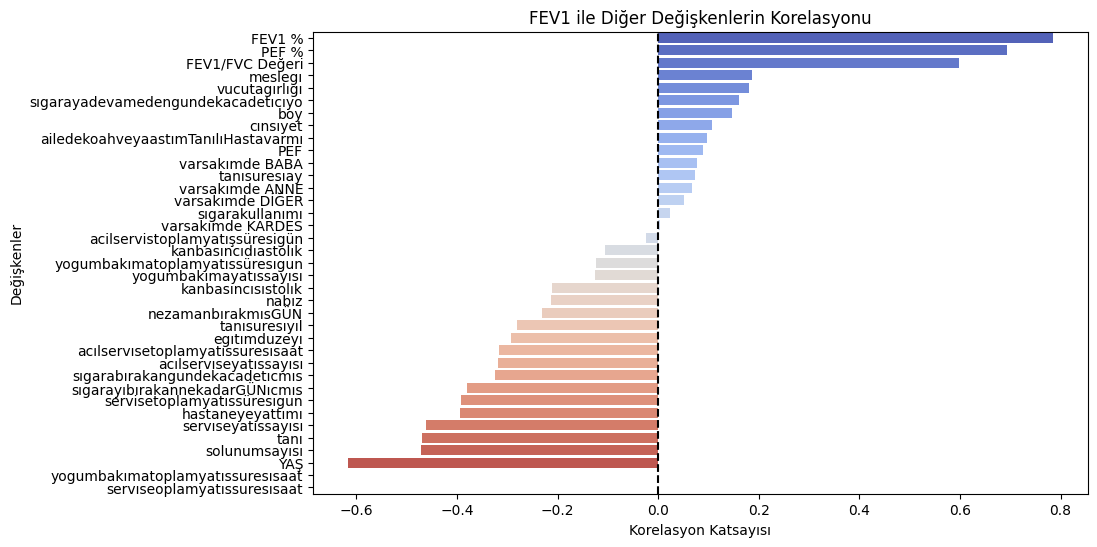

Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:
FEV1 %             0.784217
PEF %              0.692440
FEV1/FVC Değeri    0.598661
meslegı            0.186475
vucutagırlıgı      0.181251
Name: FEV1, dtype: float64
En iyi modelin kullandığı değişkenler: ['FEV1 %', 'FEV1/FVC Değeri', 'PEF', 'PEF %', 'YAŞ', 'acilservistoplamyatışsüresigün', 'acılservısetoplamyatıssuresısaat', 'acılservıseyatıssayısı', 'ailedekoahveyaastımTanılıHastavarmı', 'boy', 'cınsıyet', 'egıtımduzeyı', 'hastaneyeyattımı', 'kanbasıncıdıastolık', 'kanbasıncısıstolık', 'meslegı', 'nabız', 'nezamanbırakmısGÜN', 'servisetoplamyatıssüresıgun', 'servıseoplamyatıssuresısaat', 'servıseyatıssayısı', 'solunumsayısı', 'sıgarabırakangundekacadetıcmıs', 'sıgarakullanımı', 'sıgarayadevamedengundekacadetıcıyo', 'sıgarayıbırakannekadarGÜNıcmıs', 'tanı', 'tanısuresıay', 'tanısuresıyıl', 'varsakımde ANNE', 'varsakımde BABA', 'varsakımde DİĞER', 'varsakımde KARDES', 'vucutagırlıgı', 'yogumbakımatoplamyatıssuresısaat', 'yogu

In [42]:
# Kodunuzu çalıştırırken
target_column = 'FEV1'

# Eksik değerleri tahmin et ve doldur
data, best_model, best_r2, best_mae, best_mse, best_model_used_features = predict_missing_values_with_best_model(data, target_column)

# Korelasyon analizi yap
correlations = korelasyon_analizi(data, target_column)

# En yüksek korelasyona sahip ilk 5 değişkeni yazdır
print("Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:")
print(correlations.head(5))

# Modelin kullandığı değişkenler
print(f"En iyi modelin kullandığı değişkenler: {best_model_used_features}")


FEV 1 

Model: RandomForest, R^2 Skoru: 0.7905, MAE: 0.5102, MSE: 19.5236
Model: GradientBoosting, R^2 Skoru: 0.9992, MAE: 0.1776, MSE: 0.0724
Model: AdaBoost, R^2 Skoru: 0.9952, MAE: 0.4819, MSE: 0.4429
Model: LinearRegression, R^2 Skoru: 0.2587, MAE: 2.7210, MSE: 69.0746
Model: Ridge, R^2 Skoru: 0.2587, MAE: 2.7015, MSE: 69.0761
Model: Lasso, R^2 Skoru: 0.1569, MAE: 2.0214, MSE: 78.5629
Model: ElasticNet, R^2 Skoru: 0.1597, MAE: 1.6984, MSE: 78.2942
Model: SVR, R^2 Skoru: 0.0258, MAE: 0.8277, MSE: 90.7726
Model: KNeighbors, R^2 Skoru: 0.3246, MAE: 1.2586, MSE: 62.9339
Model: DecisionTree, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Huber, R^2 Skoru: 0.0080, MAE: 0.7914, MSE: 92.4318
Model: ExtraTrees, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: Bagging, R^2 Skoru: 0.7425, MAE: 0.4806, MSE: 23.9953
Model: GaussianProcess, R^2 Skoru: 1.0000, MAE: 0.0000, MSE: 0.0000
Model: HistGradientBoosting, R^2 Skoru: 0.5402, MAE: 1.3216, MSE: 42.8432
Model: Tweedie, R^2 Skoru: 0.1754, MAE: 1

C:\Users\Eugeo\AppData\Local\Temp\ipykernel_18816\2204540570.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


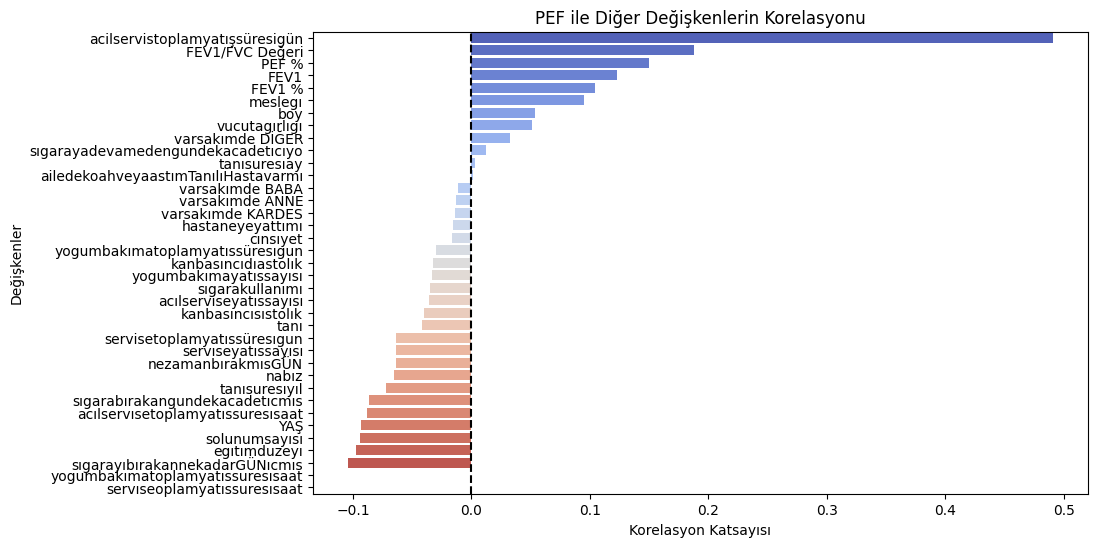

Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:
acilservistoplamyatışsüresigün    0.490544
FEV1/FVC Değeri                   0.187653
PEF %                             0.149645
FEV1                              0.123062
FEV1 %                            0.104317
Name: PEF, dtype: float64
En iyi modelin kullandığı değişkenler: ['FEV1', 'FEV1 %', 'FEV1/FVC Değeri', 'PEF %', 'YAŞ', 'acilservistoplamyatışsüresigün', 'acılservısetoplamyatıssuresısaat', 'acılservıseyatıssayısı', 'ailedekoahveyaastımTanılıHastavarmı', 'boy', 'cınsıyet', 'egıtımduzeyı', 'hastaneyeyattımı', 'kanbasıncıdıastolık', 'kanbasıncısıstolık', 'meslegı', 'nabız', 'nezamanbırakmısGÜN', 'servisetoplamyatıssüresıgun', 'servıseoplamyatıssuresısaat', 'servıseyatıssayısı', 'solunumsayısı', 'sıgarabırakangundekacadetıcmıs', 'sıgarakullanımı', 'sıgarayadevamedengundekacadetıcıyo', 'sıgarayıbırakannekadarGÜNıcmıs', 'tanı', 'tanısuresıay', 'tanısuresıyıl', 'varsakımde ANNE', 'varsakımde BABA', 'varsakımde DİĞER', 'var

In [43]:
# Kodunuzu çalıştırırken
target_column = 'PEF'

# Eksik değerleri tahmin et ve doldur
data, best_model, best_r2, best_mae, best_mse, best_model_used_features = predict_missing_values_with_best_model(data, target_column)

# Korelasyon analizi yap
correlations = korelasyon_analizi(data, target_column)

# En yüksek korelasyona sahip ilk 5 değişkeni yazdır
print("Hedef sütun ile en yüksek korelasyona sahip ilk 5 değişken:")
print(correlations.head(5))

# Modelin kullandığı değişkenler
print(f"En iyi modelin kullandığı değişkenler: {best_model_used_features}")


In [44]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(pd.DataFrame({'Missing Values': missing_values}))

Empty DataFrame
Columns: [Missing Values]
Index: []


In [45]:
# BMI = kilo (kg) / boy (m)^2 formülü ile hesaplanabilir.
data['bmi'] = data['vucutagırlıgı'] / ((data['boy'] / 100) ** 2)
data['VKİ Kategorisi'] = data['bmi'].apply(lambda vki: "Zayıf" if vki < 18.5 else ("Normal" if vki < 24.9 else ("Fazla Kilolu" if vki < 29.9 else "Obez")))
# Hipertansiyon Durumu (Kan basıncı değerlerine göre)
# Genellikle 140/90 mmHg ve üzeri hipertansiyon kabul edilir.
data['hipertansiyon'] = data.apply(lambda row: 'Evet' if row['kanbasıncısıstolık'] >= 140 or row['kanbasıncıdıastolık'] >= 90 else 'Hayır', axis=1)

data['Toplam Hastanede Kalış Süresi (Saat)'] = (
    data['acılservısetoplamyatıssuresısaat'] +
    data['yogumbakımatoplamyatıssuresısaat'] +
    data['servıseoplamyatıssuresısaat']
)

data['Toplam Hastanede Kalış Süresi (Gün)'] = (
    data['yogumbakımatoplamyatıssüresıgun'] +
    data['acilservistoplamyatışsüresigün'] +
    data['servisetoplamyatıssüresıgun']
)

data['Yaş Grubu'] = data['YAŞ'].apply(lambda age: 'Genç' if age <= 30 else ('Orta Yaş' if age <= 50 else 'Yaşlı'))
data['Cinsiyet'] = data['cınsıyet'].apply(lambda x: 'Erkek' if x == 'ERKEK' else 'Kadın')
data['Eğitim Düzeyi'] = data['egıtımduzeyı'].map({
    0: 'Okur-Yazar Değil',
    1: 'Okur-Yazar',
    2: 'İlkokul',
    3: 'Lise',
    4: 'Yüksekokul'
})

data['Meslek Grubu'] = data['meslegı'].map({
    0: 'İşsiz',
    1: 'Emekli',
    2: 'Memur',
    3: 'İşçi',
    4: 'Özel Sektör',
    5: 'Serbest'
})


data['Aile Risk Durumu'] = data['ailedekoahveyaastımTanılıHastavarmı'].apply(lambda x: 'Riskli' if x == 1 else 'Düşük Risk')

data['Sigara Yoğunluğu'] = data['sıgarabırakangundekacadetıcmıs'].apply(
    lambda adet: 'Hafif Kullanıcı' if adet <= 10 else 
                 ('Orta Kullanıcı' if adet <= 20 else 'Ağır Kullanıcı')
)



data['Hastalık Şiddeti'] = data['FEV1 %'].apply(
    lambda fev1: 'Hafif' if fev1 >= 80 else 
                 ('Orta' if fev1 >= 50 else 
                  ('Ağır' if fev1 >= 30 else 'Çok Ağır'))
)
data['PEF Kategorisi'] = data['PEF %'].apply(
    lambda pef: 'Yüksek Kapasite' if pef >= 80 else 
                ('Orta Kapasite' if pef >= 50 else 'Düşük Kapasite')
)

def calculate_risk(row):
    risk_score = 0
    # Sigara kullanımı riski
    if row['sıgarakullanımı'] == 3:
        risk_score += 2
    # Ailede hastalık riski
    if row['ailedekoahveyaastımTanılıHastavarmı'] == 1:
        risk_score += 2
    # Yaş riski
    if row['YAŞ'] > 50:
        risk_score += 1
    # FEV1 % riski
    if row['FEV1 %'] < 50:
        risk_score += 3

    # Risk seviyesini belirle
    if risk_score <= 2:
        return 'Düşük Risk'
    elif risk_score <= 5:
        return 'Orta Risk'
    else:
        return 'Yüksek Risk'

data['Risk Faktörü'] = data.apply(calculate_risk, axis=1)


def tansiyon_sigara_risk(row):
    if row['sıgarakullanımı'] == 1 and row['hipertansiyon'] == 'Evet':
        return "Yüksek Risk"
    elif row['sıgarakullanımı'] == 1:
        return "Orta Risk"
    elif row['hipertansiyon'] == 'Evet':
        return "Düşük Risk"
    else:
        return "Minimal Risk"

data['tansiyon_sigara_risk'] = data.apply(tansiyon_sigara_risk,axis=1)



# Gereksiz sütunları belirleme
gereksiz_sutunlar = [
    'boy','bmi','cınsıyet','YAŞ', 'egıtımduzeyı','vucutagırlıgı', 'ailedekoahveyaastımTanılıHastavarmı', # VKİ hesaplamasında kullanılan sütunlar  Sigara süresi hesaplamasında kullanılan sütunlar
    'acılservısetoplamyatıssuresısaat', 'yogumbakımatoplamyatıssuresısaat', 'servıseoplamyatıssuresısaat',
    'acilservistoplamyatışsüresigün','yogumbakımatoplamyatıssüresıgun','servisetoplamyatıssüresıgun','sıgarabırakangundekacadetıcmıs','FEV1 %',
    'PEF %','kanbasıncısıstolık','kanbasıncıdıastolık','meslegı', # Hastane toplam süreye dahil edilen sütunlar
]

# Gereksiz sütunları kaldırma
data = data.drop(columns=gereksiz_sutunlar)



In [46]:
# Belirtilen değişkenler
categorical_columns = [
    'tanı',
    'hastaneyeyattımı',
    'VKİ Kategorisi',
    'sıgarakullanımı'
]

# Belirtilen değişkenleri 'object' tipine çevir
for column in categorical_columns:
    if column in data.columns:
        data[column] = data[column].astype("object")

# Değişiklik sonrası veri türlerini kontrol et
print("Veri Türleri:")
print(data.dtypes)


Veri Türleri:
sıgarakullanımı                          object
sıgarayıbırakannekadarGÜNıcmıs          float64
nezamanbırakmısGÜN                      float64
sıgarayadevamedengundekacadetıcıyo      float64
tanı                                     object
tanısuresıyıl                           float64
tanısuresıay                            float64
hastaneyeyattımı                         object
acılservıseyatıssayısı                    int64
yogumbakımayatıssayısı                    int64
servıseyatıssayısı                        int64
nabız                                     int64
solunumsayısı                             int64
FEV1                                    float64
PEF                                     float64
FEV1/FVC Değeri                         float64
varsakımde ANNE                         float64
varsakımde BABA                         float64
varsakımde KARDES                       float64
varsakımde DİĞER                        float64
VKİ Kategorisi            

Winsorization, verideki aykırı değerleri belirli bir eşik değerine (örneğin, %5 ve %95 yüzdelik dilimlerine) kısıtlayarak, bu değerlerin model üzerindeki etkisini sınırlamak için kullanılan bir tekniktir.

In [47]:
data[['nezamanbırakmısGÜN','sıgarayıbırakannekadarGÜNıcmıs']]=data[['nezamanbırakmısGÜN','sıgarayıbırakannekadarGÜNıcmıs']].round()#bu da data içindeki sayılar gün olduğundan küsüratlı olamaz
numeric_columns = data.drop(categorical_columns, axis=1).select_dtypes(include=[np.number])#kategorik verileri çıkmış olna veri serti


In [48]:
# from sklearn.ensemble import IsolationForest

# # Isolation Forest modelini oluşturuyoruz
# model = IsolationForest(contamination=0.05,random_state=10)

# # Modeli sayısal veri (numeric_columns) üzerinde eğitiyoruz
# model.fit(numeric_columns)

# # Aykırı verileri tespit ediyoruz (-1: Aykırı, 1: Normal)
# outliers = model.predict(numeric_columns)

# # Aykırı olmayan (1 olan) verileri seçiyoruz ve veri setinden çıkarıyoruz
# data = data[outliers == 1]

# # Temizlenmiş veri setini görüntülemek
# outliers

In [49]:
# Veri setinin satır ve sütun sayısını yazdırma
print(f"Veri setinde kalan gözlem sayısı: {data.shape[0]}")

Veri setinde kalan gözlem sayısı: 493


Model: Logistic Regression
Accuracy: 0.9192
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.92      0.92      0.92        48

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99

--------------------------------------------------


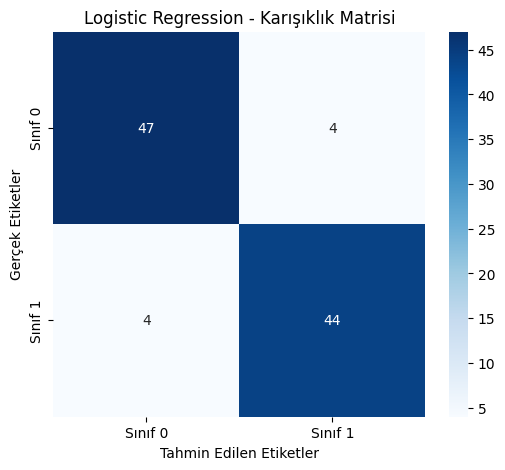

Model: Ridge Classifier
Accuracy: 0.9495
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.94      0.95        48

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99

--------------------------------------------------


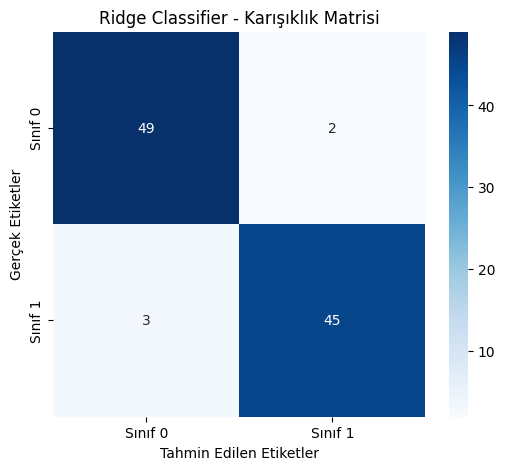

Model: Perceptron
Accuracy: 0.8586
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        51
           1       0.84      0.88      0.86        48

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99

--------------------------------------------------


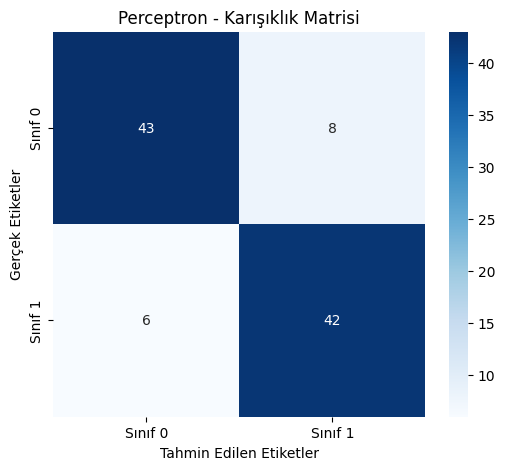

Model: Random Forest
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.91      0.85      0.88        48

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99

--------------------------------------------------


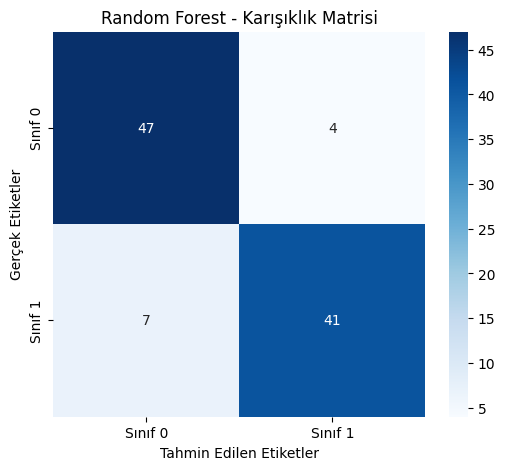

Model: Gradient Boosting
Accuracy: 0.8990
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.88      0.92      0.90        48

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99

--------------------------------------------------


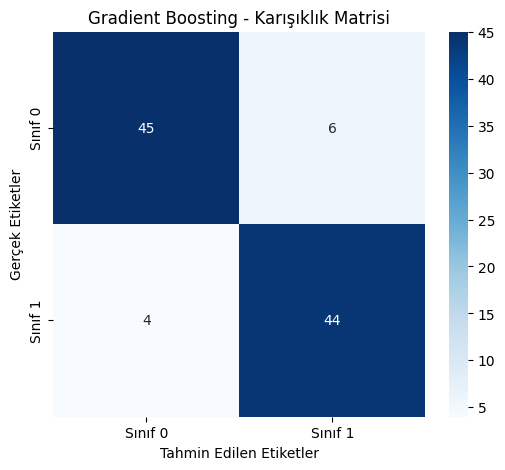

Model: AdaBoost
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.86      0.92      0.89        48

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99

--------------------------------------------------


C:\Users\Eugeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


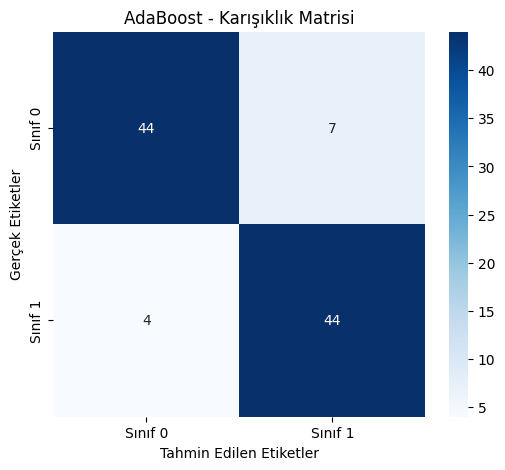

Model: SVM (RBF Kernel)
Accuracy: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        51
           1       0.90      0.92      0.91        48

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99

--------------------------------------------------


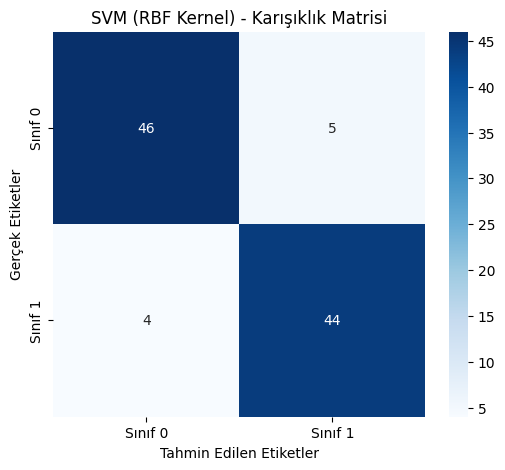

Model: XGBoost
Accuracy: 0.8990
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        51
           1       0.88      0.92      0.90        48

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99

--------------------------------------------------


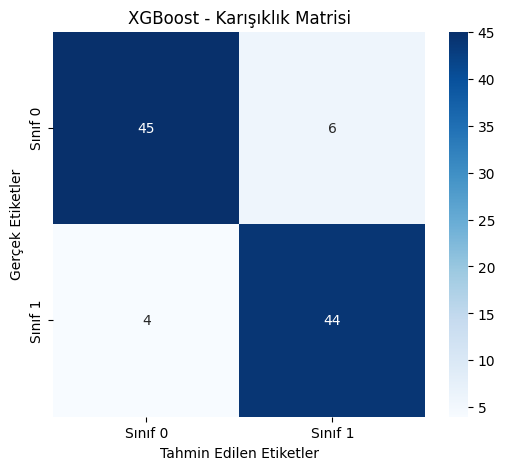

Model: CatBoost
Accuracy: 0.9192
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.90      0.94      0.92        48

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99

--------------------------------------------------


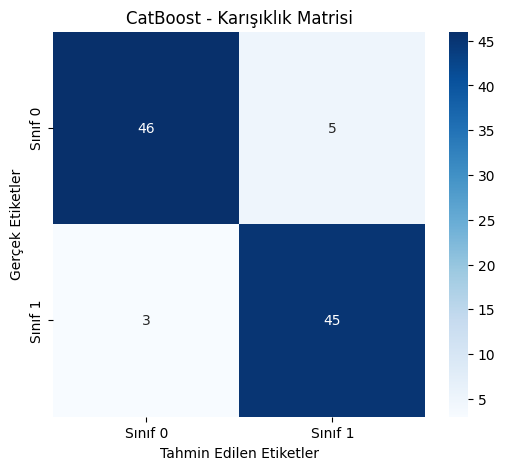

Model: Linear Discriminant Analysis
Accuracy: 0.9495
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.94      0.95        48

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99

--------------------------------------------------


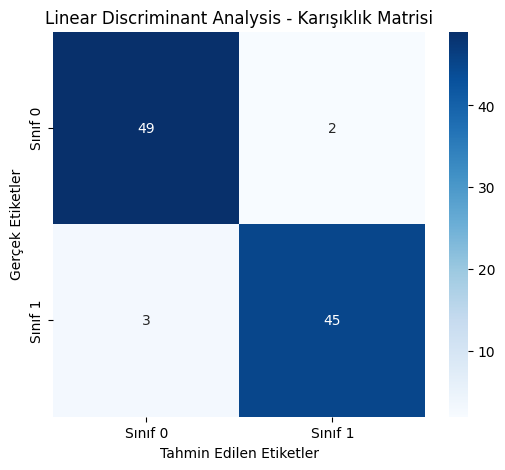

En iyi model: Ridge Classifier ile 0.95 doğruluk oranı.


C:\Users\Eugeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Eugeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


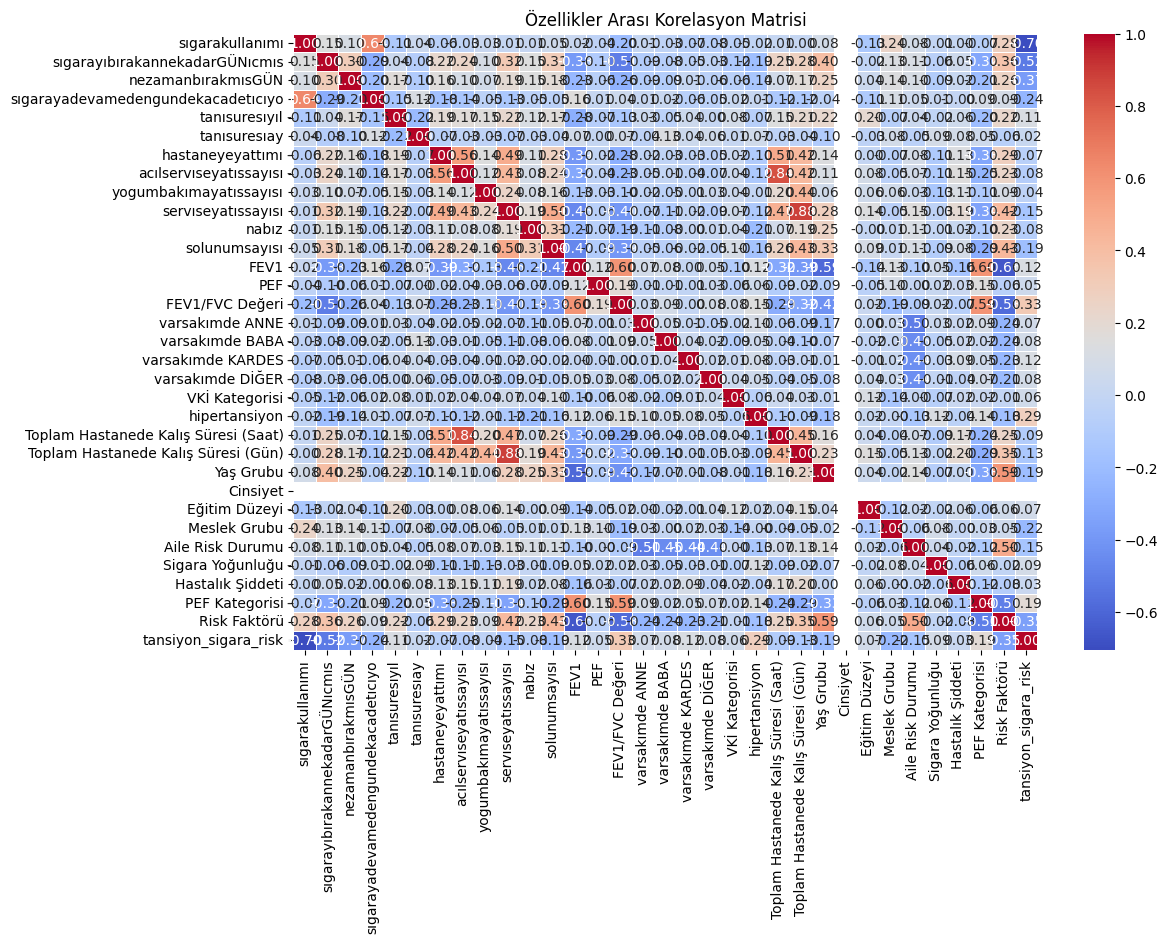

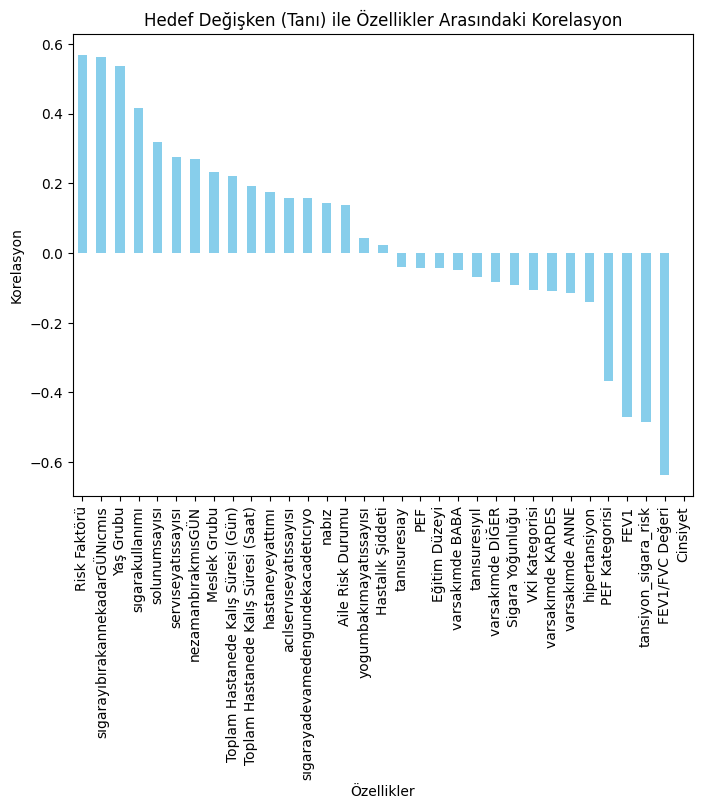

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Veri Yükleme (Örnek olarak "data" değişkenini kullanıyoruz)
# data = pd.read_csv("veri_dosyasi.csv")  # Verinizi buradan yükleyin.

# 2. Hedef değişken ve özellikleri ayır
X = data.drop(columns=['tanı'])  # 'Tanı' dışındaki tüm sütunlar özellik
y = data['tanı']  # Hedef değişken

# 3. Hedef değişkeni 1 -> 0, 2 -> 1 olacak şekilde dönüştürme
y = y.map({1: 0, 2: 1})

# 5. Kategorik Verileri Sayısallaştırma
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])

# 6. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Veriyi Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Modelleri Tanımlama
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Perceptron": Perceptron(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
}

results = {}

#  9. Modellerin Eğitimi ve Değerlendirilmesi
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Sonuçları Kaydetme
    results[model_name] = accuracy
    
    # Karışıklık Matrisini Hesapla ve Görselleştir
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sınıf 0', 'Sınıf 1'], yticklabels=['Sınıf 0', 'Sınıf 1'])
    plt.title(f"{model_name} - Karışıklık Matrisi")
    plt.xlabel('Tahmin Edilen Etiketler')
    plt.ylabel('Gerçek Etiketler')
    plt.show()

# 10. En İyi Modeli Belirleme
best_model = max(results, key=results.get)
print(f"En iyi model: {best_model} ile {results[best_model]:.2f} doğruluk oranı.")

# 11. Korelasyon Hesaplama ve Görselleştirme
# Korelasyonları hesapla
correlation_matrix = X.corr()

# Hedef değişken (tanı) ile özellikler arasındaki korelasyonu hesapla
target_correlation = X.corrwith(y)

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

# Hedef değişken ile özellikler arasındaki korelasyonu görselleştir
plt.figure(figsize=(8, 6))
target_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Hedef Değişken (Tanı) ile Özellikler Arasındaki Korelasyon')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()


In [51]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Örnek veri seti oluşturma (gerçek veri ile değiştirin)
# data = pd.read_csv("veri_dosyasi.csv")

X = data.drop(columns=['tanı'])  # 'Tanı' dışındaki tüm sütunlar özellik
y = data['tanı']  # Hedef değişken

# Hedef değişkeni 1 -> 0, 2 -> 1 olacak şekilde dönüştürme
y = y.map({1: 0, 2: 1})

# Kategorik verileri sayısallaştırma (eğer varsa)
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])
# 3. Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Veriyi ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelleri tanımlama
model = RidgeClassifier(random_state=42)

# 7. Ridge Classifier modelini eğitme ve değerlendirme
model.fit(X_train_scaled, y_train)
y_pred_ridge = model.predict(X_test_scaled)
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
print("LogisticRegression Sonuçları:")
print(f"Accuracy: {ridge_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ridge))
print("-" * 50)

print(f"En iyi model: LogisticRegression ile {ridge_accuracy:.4f} doğruluk.")

LogisticRegression Sonuçları:
Accuracy: 0.9495
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.94      0.95        48

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99

--------------------------------------------------
En iyi model: LogisticRegression ile 0.9495 doğruluk.


In [52]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Örnek veri (veri setinizi buraya ekleyin)
# Örnek için bir CSV dosyasından veri okunduğu varsayılmıştır
# data = pd.read_csv("veri_dosyasi.csv")

# Bağımlı ve bağımsız değişkenlerin ayrılması
X = data.drop(columns=['tanı'])  # 'tanı' dışındaki sütunlar özellik
y = data['tanı']  # Hedef değişken

# Hedef değişkeni 1 -> 0, 2 -> 1 olacak şekilde dönüştürme
y_mapped = y.map({1: 0, 2: 1})

# Kategorik verileri sayısallaştırma (eğer varsa)
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Veriyi ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Classifier modeli tanımlama
ridge_model = RidgeClassifier(random_state=42)

# Modeli yeniden eğitme
ridge_model.fit(X_train_scaled, y_train)

# Tahmin yapma (test seti üzerinde)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Modelin test performansını değerlendirme
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
print("Ridge Classifier Test Sonuçları:")
print(f"Accuracy: {ridge_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ridge))

# Test seti hata oranını hesaplama
test_hata_orani = (y_test != y_pred_ridge).mean() * 100
print(f"Test Verisi Hata Oranı: %{test_hata_orani:.2f}")

# Tüm veri setinde tahmin yapma
data_scaled = scaler.transform(X)  # Tüm veri setini ölçekleme
predictions_mapped = ridge_model.predict(data_scaled)
data['tanı_öngörü'] = pd.Series(predictions_mapped, index=data.index).map({0: 1, 1: 2})  # Tahmin edilen değerleri 1 ve 2'ye geri döndürme

# Hata hesaplama (tüm veri setinde)
data['hata'] = (data['tanı'] != data['tanı_öngörü']).astype(int)

# Tüm veri setinde hata oranını hesaplama
hata_orani = data['hata'].mean() * 100
print(f"Tüm Veri Seti Hata Oranı: %{hata_orani:.2f}")

# Sonuçları kontrol etme
print(data[['tanı', 'tanı_öngörü', 'hata']].head())

# Tüm veri setindeki tahmin ve gerçek değerleri karşılaştırma
print(f"Tahminlerde Farklılık Sayısı: {data['hata'].sum()}")
print(f"Gerçek Değerler:")
print(data['tanı'].value_counts())
print(f"Tahmin Değerleri:")
print(data['tanı_öngörü'].value_counts())


Çapraz Doğrulama Sonuçları:
CV Ortalama Doğruluk: 0.8935 (+/- 0.0362)
Ridge Classifier Test Sonuçları:
Accuracy: 0.9495
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.94      0.95        48

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99

Test Verisi Hata Oranı: %5.05
Tüm Veri Seti Hata Oranı: %7.71
  tanı  tanı_öngörü  hata
0    2            2     0
1    2            2     0
2    2            2     0
3    2            2     0
4    2            2     0
Tahminlerde Farklılık Sayısı: 38
Gerçek Değerler:
tanı
1    262
2    231
Name: count, dtype: int64
Tahmin Değerleri:
tanı_öngörü
1    266
2    227
Name: count, dtype: int64


en iyi accuracy LogisticRegression verid

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Veri setlerini yükleme
test_file_path = 'E:/Projeler/Sales-Data-Analysis/düzenlenmiş_test_verisi.csv'

train_data = data
test_data = pd.read_csv(test_file_path)

# Hedef ve hasta numarasi sütun adı
TARGET_COLUMN = 'tanı'
HASTA_NO_COLUMN = 'hastaNo'

# Hedef değişken kontrolü
if TARGET_COLUMN not in train_data.columns:
    raise ValueError(f"Eğitim veri setinde '{TARGET_COLUMN}' bulunamadı.")

# Hasta numarası kontrolü
if HASTA_NO_COLUMN not in test_data.columns:
    raise ValueError(f"Test veri setinde '{HASTA_NO_COLUMN}' bulunamadı.")

# Ortak sütunları seçme (hedef sütunu hariç)
common_columns = train_data.columns.intersection(test_data.columns).tolist()

# Kategorik değişkenleri kodlama (train ve test verisi için)
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    if column == TARGET_COLUMN:
        continue
    le = LabelEncoder()
    # Eğitim verisini kodlama
    train_data[column] = le.fit_transform(train_data[column])
    
    # Test verisinde de aynı kodlamayı uygulama (bilinmeyen değerleri görmezden gelerek)
    if column in test_data.columns:
        test_data[column] = le.transform(test_data[column])
        
    label_encoders[column] = le

# Hedef değişkeni kodlama (train verisi için)
if train_data[TARGET_COLUMN].dtype == 'object':
    target_encoder = LabelEncoder()
    train_data[TARGET_COLUMN] = target_encoder.fit_transform(train_data[TARGET_COLUMN])

# Özellikler ve hedef değişkeni ayırma
X = train_data.drop(columns=[TARGET_COLUMN])
y = train_data[TARGET_COLUMN]

# Eğitim ve doğrulama setine ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = RidgeClassifier(random_state=42)
model.fit(X_train, y_train)

# Doğrulama setinde performans değerlendirme
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Doğrulama seti doğruluğu: {accuracy:.2f}")

# Test veri setinden yalnızca ortak sütunları seçme
test_features = test_data.loc[:, common_columns]

# Test veri seti için tahmin yapma
predictions = model.predict(test_features)

# Tahminleri eski değerlere dönüştürme (kodlama varsa)
if 'target_encoder' in locals():
    predictions = target_encoder.inverse_transform(predictions)

# # Hasta numarası ve tahminleri kaydetme
# output_file_path = 'E:/Projeler/Sales-Data-Analysis/test_predictions.csv'
# output_df = pd.DataFrame({HASTA_NO_COLUMN: test_data[HASTA_NO_COLUMN], TARGET_COLUMN: predictions})
# output_df.to_csv(output_file_path, index=False)
# print(f"Tahminler '{output_file_path}' dosyasına kaydedildi.")

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Projeler/Sales-Data-Analysis/düzenlenmiş_test_verisi.csv'

In [ ]:
# Tanı etiketlerini eklemek için eşleme (1: Astım, 2: KOAH)
data['tanı'] = data['tanı'].replace({1: 'Astım', 2: 'KOAH'})

# Frekansları hesaplama
tanı_frekans = data['tanı'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
tanı_frekans.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    labels=tanı_frekans.index
)
plt.title('Tanı Dağılımı')
plt.ylabel('')  # Yatay ekseni gizleme
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# VKİ kategorilerine göre dağılım
vki_kategorisi_frekans = data['VKİ Kategorisi'].value_counts()

# Pasta grafiği
plt.figure(figsize=(8, 6))
vki_kategorisi_frekans.plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    labels=vki_kategorisi_frekans.index
)
plt.title('VKİ Kategorisi Dağılımı')
plt.ylabel('')
plt.show()


In [ ]:
# Hipertansiyon dağılımı
hipertansiyon_frekans = data['hipertansiyon'].value_counts()

# Çubuk grafiği
plt.figure(figsize=(8, 6))
hipertansiyon_frekans.plot.bar(color=['#66b3ff', '#ff9999'])
plt.title('Hipertansiyon Durumu Dağılımı')
plt.xlabel('Hipertansiyon')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# 'meslegi' sütunundaki değerlerin sayımlarını hesapla
meslegi_count = data['meslegı'].value_counts()
# Değerlerin etiketlerini tanımla
labels = {
    0: 'İŞSİZ',
    1: 'EMEKLİ',
    2: 'MEMUR',
    3: 'İŞÇİ',
    4: 'ÖZEL SEKTÖR',
    5: 'SERBEST'
}
# Sayıları ve etiketleri kullanarak grafiği oluştur
plt.figure(figsize=(10, 6))
meslegi_count.index = meslegi_count.index.map(labels)  # Sayıları etiketlere dönüştür
meslegi_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Meslek Dağılımı', fontsize=14)
plt.xlabel('Meslek', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)

# Y eksenindeki sayıları döndür
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()

In [ ]:
# 'sigarakullanimi' sütunundaki değerlerin sayımlarını hesapla
sigarakullanimi_count = data['sıgarakullanımı'].value_counts()

# Değerlerin etiketlerini tanımla
labels = {
    1: 'HİÇ İÇMEMEMİŞ',
    2: 'BIRAKMIŞ',
    3: 'HALEN İÇİYOR'
}

# Sayıları ve etiketleri kullanarak grafiği oluştur
plt.figure(figsize=(10, 6))
sigarakullanimi_count.index = sigarakullanimi_count.index.map(labels)  # Sayıları etiketlere dönüştür
sigarakullanimi_count.plot(kind='bar', color='salmon', edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Sigara Kullanım Durumu', fontsize=14)
plt.xlabel('Durum', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)

# Y eksenindeki sayıları döndür
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()

In [ ]:
# 'ailedekoahveyaastımTanılıHastavarmı' sütunundaki değerlerin sayımlarını hesapla
ailede_hasta_count = data['ailedekoahveyaastımTanılıHastavarmı'].value_counts()

# Değerlerin etiketlerini tanımla
labels = {
    1: 'HAYIR',
    2: 'EVET'
}

# Sayıları ve etiketleri kullanarak grafiği oluştur
plt.figure(figsize=(8, 6))
ailede_hasta_count.index = ailede_hasta_count.index.map(labels)  # Sayıları etiketlere dönüştür
ailede_hasta_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Ailede KOAH veya Astım Tanılı Hastalık Durumu', fontsize=14)
plt.xlabel('Durum', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)

# Y eksenindeki sayıları döndür
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()

In [ ]:

# 'cinsiyet' sütunundaki değerlerin sayımlarını hesapla
cinsiyet_count = data['cınsıyet'].value_counts()

# Değerlerin etiketlerini tanımla
labels = {
    1: 'ERKEK',
    2: 'KADIN'
}

# Sayıları ve etiketleri kullanarak grafiği oluştur
plt.figure(figsize=(8, 6))
cinsiyet_count.index = cinsiyet_count.index.map(labels)  # Sayıları etiketlere dönüştür
cinsiyet_count.plot(kind='bar', color='lightcoral', edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Cinsiyet Dağılımı', fontsize=14)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)

# Y eksenindeki sayıları döndür
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()